In [1]:
from min30_zeroInf_negative_Binomial import *
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.pyplot import figure
from PIL import Image
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot
from Utils.eval import *
from tensorflow.keras.optimizers import Adam
import keras.backend.tensorflow_backend
from keras.backend import clear_session
from tensorflow.keras.models import Model,Sequential

Num GPUs: 1


Using TensorFlow backend.


In [2]:
source_model,modelpath,train,test = getModel(False)
source_model.summary()
predictions = source_model.layers[-2].output
model = Model(inputs=source_model.inputs, outputs=predictions)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 96, 96, 5)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 96, 96, 20)   920         input_1[0][0]                    
__________________________________________________________________________________________________
activation (Activation)         (None, 96, 96, 20)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 48, 48, 20)   0           activation[0][0]                 
______________________________________________________________________________________________

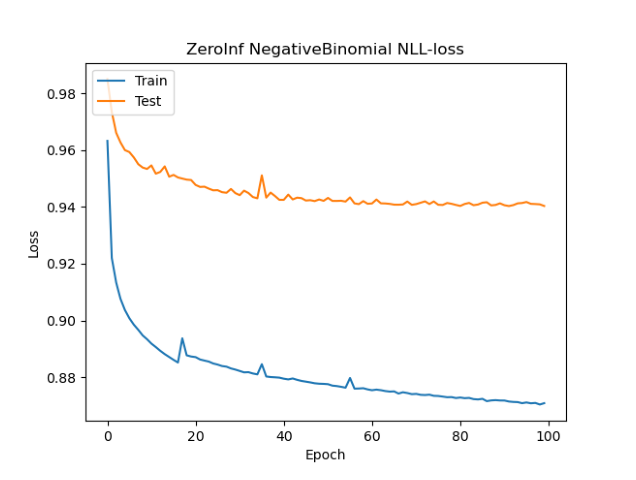

In [3]:
history_path = os.path.join(modelpath,MODELNAME+"_history.png")
figure(num=None, figsize=(10, 30), dpi=80, facecolor='w', edgecolor='k')
loss = np.array(Image.open(history_path))
plt.imshow(loss)
plt.axis('off')
plt.show()
y_transform = [cutOut([16,80,16,80])]

In [4]:
history_path = os.path.join(modelpath,MODELNAME+"_history")
laststate = getBestState(modelpath,history_path)
epoch = laststate["epoch"]
model.load_weights(laststate["modelpath"])
test.setWiggle_off()

In [5]:
def getFreshSet(batch_size=1):
    #x_transform = [Normalize(0.007742631458799244, 0.015872015890555563 )]
    
    train,test = getData(batch_size,
                         DIMENSION,CHANNELS,
                         timeToPred=30,
                         y_transform=y_transform)
    return train,test

In [10]:
from Models.Distributions import ZeroInflated_Binomial
pred = None
label = None
pred = 20
#test.on_epoch_end()
mean = []
stdev = []
label = []
predictions = []
train,test = getFreshSet(50)
#test.on_epoch_end()
#for i in test.indices:
#    print(i,test.data[i][0].split("/")[-1])
test.setWiggle_off()
atm = []
for x,y in test:
    for i in range(BATCH_SIZE):
        pred = model(np.array([x[i,:,:,:]]))
        pred = ZeroInflated_Binomial()(pred)
        mean.append(pred.mean())
        stdev.append(pred.stddev())
        label.append(y[i,:,:,:])
        predictions.append((pred,y[i:,:,:]))
        atm.append(x[i,:,:,-1:])
        if len(label) == 20:
            break
    break
    if len(label) == 20:
                break

109 1507030305.png
110 1507030310.png
111 1507030315.png
112 1507030320.png
113 1507030325.png
114 1507030330.png
115 1507030335.png
116 1507030340.png
117 1507030345.png
118 1507030350.png
119 1507030355.png
120 1507030400.png
121 1507030405.png
122 1507030410.png
123 1507030415.png
124 1507030420.png
125 1507030425.png
126 1507030430.png
127 1507030435.png
128 1507030440.png
129 1507030445.png
130 1507030450.png
131 1507030455.png
132 1507030500.png
133 1507030505.png
134 1507030510.png
135 1507030515.png
136 1507030520.png
137 1507030525.png
138 1507030530.png
139 1507030535.png
140 1507030540.png
141 1507030545.png
142 1507030550.png
143 1507030555.png
144 1507030600.png
145 1507030605.png
146 1507030610.png
147 1507030615.png
148 1507030620.png
149 1507030625.png
150 1507030630.png
151 1507030635.png
152 1507030640.png
153 1507030645.png
154 1507030650.png
155 1507030655.png
156 1507030700.png
157 1507030705.png
158 1507030710.png
159 1507030715.png
160 1507030720.png
161 15070307

7072 1507270720.png
7073 1507270725.png
7074 1507270730.png
7075 1507270735.png
7076 1507270740.png
7077 1507270745.png
7078 1507270750.png
7079 1507270755.png
7080 1507270800.png
7081 1507270805.png
7082 1507270810.png
7083 1507270815.png
7084 1507270820.png
7085 1507270825.png
7086 1507270830.png
7087 1507270835.png
7088 1507270840.png
7089 1507270845.png
7090 1507270850.png
7091 1507270855.png
7092 1507270900.png
7093 1507270905.png
7094 1507270910.png
7095 1507270915.png
7096 1507270920.png
7097 1507270925.png
7098 1507270930.png
7099 1507270935.png
7100 1507270940.png
7101 1507270945.png
7102 1507270950.png
7103 1507270955.png
7104 1507271000.png
7105 1507271005.png
7106 1507271010.png
7107 1507271015.png
7108 1507271020.png
7109 1507271025.png
7110 1507271030.png
7111 1507271035.png
7112 1507271040.png
7113 1507271045.png
7114 1507271050.png
7115 1507271055.png
7116 1507271100.png
7117 1507271105.png
7118 1507271110.png
7119 1507271115.png
7120 1507271120.png
7121 1507271125.png


13535 1508181755.png
13536 1508181800.png
13537 1508181805.png
13538 1508181810.png
13539 1508181815.png
13540 1508181820.png
13541 1508181825.png
13542 1508181830.png
13543 1508181835.png
13544 1508181840.png
13545 1508181845.png
13546 1508181850.png
13547 1508181855.png
13548 1508181900.png
13549 1508181905.png
13550 1508181910.png
13551 1508181915.png
13552 1508181920.png
13553 1508181925.png
13554 1508181930.png
13555 1508181935.png
13556 1508181940.png
13557 1508181945.png
13558 1508181950.png
13559 1508181955.png
13560 1508182000.png
13561 1508182005.png
13562 1508182010.png
13563 1508182015.png
13564 1508182020.png
13565 1508182025.png
13566 1508182030.png
13567 1508182035.png
13568 1508182040.png
13569 1508182045.png
13570 1508182050.png
13571 1508182055.png
13572 1508182100.png
13573 1508182105.png
13574 1508182110.png
13575 1508182115.png
13576 1508182120.png
13577 1508182125.png
13578 1508182130.png
13579 1508182135.png
13580 1508182140.png
13581 1508182145.png
13582 1508182

15556 1508251820.png
15557 1508251825.png
15558 1508251830.png
15559 1508251835.png
15560 1508251840.png
15561 1508251845.png
15562 1508251850.png
15575 1508251955.png
15576 1508252000.png
15577 1508252005.png
15578 1508252010.png
15579 1508252015.png
15580 1508252020.png
15581 1508252025.png
15582 1508252030.png
15583 1508252035.png
15584 1508252040.png
15588 1508252100.png
15589 1508252105.png
15590 1508252110.png
15591 1508252115.png
15592 1508252120.png
15593 1508252125.png
15594 1508252130.png
15595 1508252135.png
15597 1508252145.png
15598 1508252150.png
15599 1508252155.png
15600 1508252200.png
15601 1508252205.png
15602 1508252210.png
15603 1508252215.png
15604 1508252220.png
15605 1508252225.png
15606 1508252230.png
15607 1508252235.png
15608 1508252240.png
15609 1508252245.png
15610 1508252250.png
15614 1508252310.png
15615 1508252315.png
15616 1508252320.png
15617 1508252325.png
15618 1508252330.png
15619 1508252335.png
15621 1508252345.png
15622 1508252350.png
15623 1508252

23219 1509210855.png
23220 1509210900.png
23221 1509210905.png
23222 1509210910.png
23223 1509210915.png
23224 1509210920.png
23225 1509210925.png
23226 1509210930.png
23227 1509210935.png
23228 1509210940.png
23229 1509210945.png
23230 1509210950.png
23231 1509210955.png
23232 1509211000.png
23233 1509211005.png
23234 1509211010.png
23235 1509211015.png
23236 1509211020.png
23237 1509211025.png
23238 1509211030.png
23239 1509211035.png
23240 1509211040.png
23241 1509211045.png
23242 1509211050.png
23243 1509211055.png
23244 1509211100.png
23245 1509211105.png
23246 1509211110.png
23247 1509211115.png
23248 1509211120.png
23249 1509211125.png
23250 1509211130.png
23251 1509211135.png
23252 1509211140.png
23253 1509211145.png
23254 1509211150.png
23255 1509211155.png
23256 1509211200.png
23257 1509211205.png
23258 1509211210.png
23259 1509211215.png
23260 1509211220.png
23261 1509211225.png
23262 1509211230.png
23263 1509211235.png
23264 1509211240.png
23320 1509211720.png
23321 1509211

37545 1511100245.png
37583 1511100555.png
37584 1511100600.png
37585 1511100605.png
37586 1511100610.png
37587 1511100615.png
37588 1511100620.png
37589 1511100625.png
37620 1511100900.png
37621 1511100905.png
37622 1511100910.png
37623 1511100915.png
37624 1511100920.png
37625 1511100925.png
37626 1511100930.png
37627 1511100935.png
37628 1511100940.png
37629 1511100945.png
37630 1511100950.png
37631 1511100955.png
37632 1511101000.png
37633 1511101005.png
37634 1511101010.png
37635 1511101015.png
37636 1511101020.png
37637 1511101025.png
37638 1511101030.png
37639 1511101035.png
37640 1511101040.png
37641 1511101045.png
37642 1511101050.png
37643 1511101055.png
37644 1511101100.png
37645 1511101105.png
37646 1511101110.png
37647 1511101115.png
37648 1511101120.png
37649 1511101125.png
37650 1511101130.png
37651 1511101135.png
37652 1511101140.png
37653 1511101145.png
37654 1511101150.png
37655 1511101155.png
37656 1511101200.png
37657 1511101205.png
37670 1511101310.png
37671 1511101

42172 1511260420.png
42173 1511260425.png
42174 1511260430.png
42175 1511260435.png
42176 1511260440.png
42177 1511260445.png
42178 1511260450.png
42179 1511260455.png
42180 1511260500.png
42200 1511260640.png
42201 1511260645.png
42202 1511260650.png
42203 1511260655.png
42204 1511260700.png
42205 1511260705.png
42206 1511260710.png
42207 1511260715.png
42208 1511260720.png
42209 1511260725.png
42210 1511260730.png
42211 1511260735.png
42212 1511260740.png
42213 1511260745.png
42214 1511260750.png
42215 1511260755.png
42216 1511260800.png
42217 1511260805.png
42218 1511260810.png
42219 1511260815.png
42220 1511260820.png
42221 1511260825.png
42277 1511261305.png
42278 1511261310.png
42279 1511261315.png
42280 1511261320.png
42281 1511261325.png
42282 1511261330.png
42283 1511261335.png
42284 1511261340.png
42287 1511261355.png
42288 1511261400.png
42289 1511261405.png
42290 1511261410.png
42291 1511261415.png
42292 1511261420.png
42293 1511261425.png
42294 1511261430.png
42295 1511261

52293 1512310745.png
52294 1512310750.png
52295 1512310755.png
52296 1512310800.png
52297 1512310805.png
52298 1512310810.png
52299 1512310815.png
52300 1512310820.png
52301 1512310825.png
52302 1512310830.png
52303 1512310835.png
52304 1512310840.png
52305 1512310845.png
52306 1512310850.png
52307 1512310855.png
52308 1512310900.png
52309 1512310905.png
52310 1512310910.png
52311 1512310915.png
52312 1512310920.png
52313 1512310925.png
52314 1512310930.png
52315 1512310935.png
52316 1512310940.png
52317 1512310945.png
52318 1512310950.png
52319 1512310955.png
52320 1512311000.png
52321 1512311005.png
52322 1512311010.png
52323 1512311015.png
52324 1512311020.png
52325 1512311025.png
52326 1512311030.png
52327 1512311035.png
52328 1512311040.png
52329 1512311045.png
52330 1512311050.png
52331 1512311055.png
52332 1512311100.png
52333 1512311105.png
52334 1512311110.png
52335 1512311115.png
52336 1512311120.png
52337 1512311125.png
52338 1512311130.png
52339 1512311135.png
52340 1512311

58069 1601200905.png
58070 1601200910.png
58071 1601200915.png
58072 1601200920.png
58073 1601200925.png
58074 1601200930.png
58075 1601200935.png
58076 1601200940.png
58077 1601200945.png
58078 1601200950.png
58079 1601200955.png
58080 1601201000.png
58118 1601201310.png
58119 1601201315.png
58120 1601201320.png
58121 1601201325.png
58122 1601201330.png
58123 1601201335.png
58124 1601201340.png
58125 1601201345.png
58126 1601201350.png
58127 1601201355.png
58128 1601201400.png
58129 1601201405.png
58130 1601201410.png
58131 1601201415.png
58132 1601201420.png
58133 1601201425.png
58134 1601201430.png
58135 1601201435.png
58136 1601201440.png
58137 1601201445.png
58138 1601201450.png
58139 1601201455.png
58140 1601201500.png
58141 1601201505.png
58142 1601201510.png
58143 1601201515.png
58144 1601201520.png
58145 1601201525.png
58146 1601201530.png
58147 1601201535.png
58148 1601201540.png
58149 1601201545.png
58150 1601201550.png
58151 1601201555.png
58152 1601201600.png
58782 1601222

64433 1602111125.png
64434 1602111130.png
64435 1602111135.png
64436 1602111140.png
64437 1602111145.png
64438 1602111150.png
64439 1602111155.png
64440 1602111200.png
64441 1602111205.png
64442 1602111210.png
64443 1602111215.png
64444 1602111220.png
64445 1602111225.png
64446 1602111230.png
64447 1602111235.png
64448 1602111240.png
64449 1602111245.png
64450 1602111250.png
64451 1602111255.png
64452 1602111300.png
64453 1602111305.png
64454 1602111310.png
64455 1602111315.png
64456 1602111320.png
64457 1602111325.png
64458 1602111330.png
64459 1602111335.png
64460 1602111340.png
64461 1602111345.png
64462 1602111350.png
64463 1602111355.png
64464 1602111400.png
64465 1602111405.png
64466 1602111410.png
64467 1602111415.png
64468 1602111420.png
64469 1602111425.png
64470 1602111430.png
64471 1602111435.png
64472 1602111440.png
64473 1602111445.png
64474 1602111450.png
64475 1602111455.png
64476 1602111500.png
64477 1602111505.png
64478 1602111510.png
64479 1602111515.png
64480 1602111

71135 1603051755.png
71136 1603051800.png
71137 1603051805.png
71138 1603051810.png
71139 1603051815.png
71140 1603051820.png
71141 1603051825.png
71142 1603051830.png
71143 1603051835.png
71144 1603051840.png
71145 1603051845.png
71146 1603051850.png
71147 1603051855.png
71148 1603051900.png
71149 1603051905.png
71150 1603051910.png
71151 1603051915.png
71152 1603051920.png
71153 1603051925.png
71154 1603051930.png
71155 1603051935.png
71156 1603051940.png
71157 1603051945.png
71158 1603051950.png
71159 1603051955.png
71160 1603052000.png
71161 1603052005.png
71162 1603052010.png
71163 1603052015.png
71164 1603052020.png
71165 1603052025.png
71166 1603052030.png
71167 1603052035.png
71340 1603061100.png
71341 1603061105.png
71342 1603061110.png
71343 1603061115.png
71344 1603061120.png
71345 1603061125.png
71346 1603061130.png
71347 1603061135.png
71348 1603061140.png
71349 1603061145.png
71350 1603061150.png
71351 1603061155.png
71352 1603061200.png
71353 1603061205.png
71354 1603061

82191 1604130315.png
82192 1604130320.png
82193 1604130325.png
82194 1604130330.png
82195 1604130335.png
82196 1604130340.png
82197 1604130345.png
82198 1604130350.png
82199 1604130355.png
82200 1604130400.png
82201 1604130405.png
82202 1604130410.png
82203 1604130415.png
82204 1604130420.png
82205 1604130425.png
82206 1604130430.png
82207 1604130435.png
82208 1604130440.png
82209 1604130445.png
82210 1604130450.png
82211 1604130455.png
82212 1604130500.png
82213 1604130505.png
82214 1604130510.png
82215 1604130515.png
82216 1604130520.png
82217 1604130525.png
82218 1604130530.png
82219 1604130535.png
82220 1604130540.png
82221 1604130545.png
82222 1604130550.png
82223 1604130555.png
82224 1604130600.png
82225 1604130605.png
82226 1604130610.png
82227 1604130615.png
82228 1604130620.png
82229 1604130625.png
82230 1604130630.png
82231 1604130635.png
82232 1604130640.png
82233 1604130645.png
82234 1604130650.png
82235 1604130655.png
82236 1604130700.png
82237 1604130705.png
82390 1604131

88022 1605030910.png
88023 1605030915.png
88024 1605030920.png
88025 1605030925.png
88026 1605030930.png
88027 1605030935.png
88028 1605030940.png
88029 1605030945.png
88030 1605030950.png
88031 1605030955.png
88032 1605031000.png
88033 1605031005.png
88034 1605031010.png
88035 1605031015.png
88036 1605031020.png
88037 1605031025.png
88038 1605031030.png
88039 1605031035.png
88040 1605031040.png
88041 1605031045.png
88042 1605031050.png
88043 1605031055.png
88044 1605031100.png
88045 1605031105.png
88046 1605031110.png
88047 1605031115.png
88048 1605031120.png
88049 1605031125.png
88050 1605031130.png
88051 1605031135.png
88052 1605031140.png
88053 1605031145.png
88054 1605031150.png
88055 1605031155.png
88056 1605031200.png
88057 1605031205.png
88058 1605031210.png
88059 1605031215.png
88060 1605031220.png
88061 1605031225.png
88062 1605031230.png
88063 1605031235.png
88064 1605031240.png
88065 1605031245.png
88066 1605031250.png
88067 1605031255.png
88068 1605031300.png
88069 1605031

99452 1606120140.png
99453 1606120145.png
99454 1606120150.png
99455 1606120155.png
99456 1606120200.png
99457 1606120205.png
99458 1606120210.png
99459 1606120215.png
99460 1606120220.png
99461 1606120225.png
99462 1606120230.png
99463 1606120235.png
99464 1606120240.png
99465 1606120245.png
99466 1606120250.png
99467 1606120255.png
99468 1606120300.png
99469 1606120305.png
99470 1606120310.png
99471 1606120315.png
99472 1606120320.png
99473 1606120325.png
99474 1606120330.png
99475 1606120335.png
99476 1606120340.png
99477 1606120345.png
99478 1606120350.png
99479 1606120355.png
99480 1606120400.png
99481 1606120405.png
99482 1606120410.png
99483 1606120415.png
99484 1606120420.png
99485 1606120425.png
99486 1606120430.png
99487 1606120435.png
99488 1606120440.png
99489 1606120445.png
99490 1606120450.png
99491 1606120455.png
99492 1606120500.png
99493 1606120505.png
99494 1606120510.png
99495 1606120515.png
99496 1606120520.png
99497 1606120525.png
99498 1606120530.png
99499 1606120

104318 1606282310.png
104319 1606282315.png
104320 1606282320.png
104321 1606282325.png
104322 1606282330.png
104323 1606282335.png
104324 1606282340.png
104325 1606282345.png
104326 1606282350.png
104327 1606282355.png
104328 1606290000.png
104329 1606290005.png
104330 1606290010.png
104331 1606290015.png
104332 1606290020.png
104333 1606290025.png
104334 1606290030.png
104335 1606290035.png
104336 1606290040.png
104337 1606290045.png
104338 1606290050.png
104339 1606290055.png
104340 1606290100.png
104341 1606290105.png
104342 1606290110.png
104343 1606290115.png
104344 1606290120.png
104345 1606290125.png
104346 1606290130.png
104347 1606290135.png
104348 1606290140.png
104349 1606290145.png
104350 1606290150.png
104351 1606290155.png
104352 1606290200.png
104353 1606290205.png
104354 1606290210.png
104355 1606290215.png
104356 1606290220.png
104357 1606290225.png
104358 1606290230.png
104359 1606290235.png
104360 1606290240.png
104361 1606290245.png
104362 1606290250.png
104363 160

110848 1607211520.png
110849 1607211525.png
110850 1607211530.png
110851 1607211535.png
110852 1607211540.png
110853 1607211545.png
110854 1607211550.png
110855 1607211555.png
110856 1607211600.png
110857 1607211605.png
110858 1607211610.png
110859 1607211615.png
110860 1607211620.png
110861 1607211625.png
110862 1607211630.png
110863 1607211635.png
110864 1607211640.png
110865 1607211645.png
110866 1607211650.png
110867 1607211655.png
110868 1607211700.png
110869 1607211705.png
110870 1607211710.png
110871 1607211715.png
110872 1607211720.png
110873 1607211725.png
110874 1607211730.png
110875 1607211735.png
110876 1607211740.png
110877 1607211745.png
110878 1607211750.png
110879 1607211755.png
110880 1607211800.png
110881 1607211805.png
110882 1607211810.png
110883 1607211815.png
110884 1607211820.png
110885 1607211825.png
110886 1607211830.png
110887 1607211835.png
110888 1607211840.png
110889 1607211845.png
110890 1607211850.png
110891 1607211855.png
110892 1607211900.png
110893 160

116312 1608091440.png
116313 1608091445.png
116314 1608091450.png
116315 1608091455.png
116316 1608091500.png
116317 1608091505.png
116318 1608091510.png
116319 1608091515.png
116320 1608091520.png
116321 1608091525.png
116322 1608091530.png
116323 1608091535.png
116324 1608091540.png
116325 1608091545.png
116326 1608091550.png
116327 1608091555.png
116328 1608091600.png
116329 1608091605.png
116330 1608091610.png
116331 1608091615.png
116332 1608091620.png
116333 1608091625.png
116334 1608091630.png
116335 1608091635.png
116336 1608091640.png
116337 1608091645.png
116338 1608091650.png
116339 1608091655.png
116340 1608091700.png
116341 1608091705.png
116342 1608091710.png
116343 1608091715.png
116344 1608091720.png
116345 1608091725.png
116346 1608091730.png
116347 1608091735.png
116348 1608091740.png
116349 1608091745.png
116350 1608091750.png
116351 1608091755.png
116352 1608091800.png
116353 1608091805.png
116354 1608091810.png
116355 1608091815.png
116356 1608091820.png
116357 160

131097 1609292245.png
131098 1609292250.png
131099 1609292255.png
131100 1609292300.png
131101 1609292305.png
131102 1609292310.png
131103 1609292315.png
131104 1609292320.png
131105 1609292325.png
131106 1609292330.png
131107 1609292335.png
131108 1609292340.png
131109 1609292345.png
131110 1609292350.png
131115 1609300015.png
131116 1609300020.png
131117 1609300025.png
131118 1609300030.png
131119 1609300035.png
131120 1609300040.png
131121 1609300045.png
131122 1609300050.png
131123 1609300055.png
131124 1609300100.png
131130 1609300130.png
131131 1609300135.png
131132 1609300140.png
131133 1609300145.png
131134 1609300150.png
131135 1609300155.png
131136 1609300200.png
131137 1609300205.png
131138 1609300210.png
131139 1609300215.png
131140 1609300220.png
131141 1609300225.png
131142 1609300230.png
131143 1609300235.png
131144 1609300240.png
131145 1609300245.png
131146 1609300250.png
131147 1609300255.png
131148 1609300300.png
131247 1609301115.png
131248 1609301120.png
131249 160

137670 1610221830.png
137671 1610221835.png
137672 1610221840.png
137673 1610221845.png
137674 1610221850.png
137675 1610221855.png
137676 1610221900.png
137677 1610221905.png
137678 1610221910.png
137679 1610221915.png
137680 1610221920.png
137681 1610221925.png
137682 1610221930.png
137683 1610221935.png
137684 1610221940.png
137685 1610221945.png
137686 1610221950.png
137687 1610221955.png
137688 1610222000.png
137689 1610222005.png
137690 1610222010.png
137691 1610222015.png
137692 1610222020.png
137693 1610222025.png
137694 1610222030.png
137695 1610222035.png
137696 1610222040.png
137697 1610222045.png
137698 1610222050.png
137699 1610222055.png
137700 1610222100.png
137701 1610222105.png
137702 1610222110.png
137703 1610222115.png
137704 1610222120.png
137705 1610222125.png
137706 1610222130.png
137707 1610222135.png
137708 1610222140.png
137709 1610222145.png
137710 1610222150.png
137711 1610222155.png
137712 1610222200.png
137713 1610222205.png
137714 1610222210.png
137715 161

145068 1611171100.png
145069 1611171105.png
145070 1611171110.png
145071 1611171115.png
145072 1611171120.png
145073 1611171125.png
145074 1611171130.png
145075 1611171135.png
145076 1611171140.png
145077 1611171145.png
145078 1611171150.png
145079 1611171155.png
145080 1611171200.png
145081 1611171205.png
145082 1611171210.png
145083 1611171215.png
145084 1611171220.png
145085 1611171225.png
145086 1611171230.png
145087 1611171235.png
145088 1611171240.png
145089 1611171245.png
145090 1611171250.png
145091 1611171255.png
145092 1611171300.png
145093 1611171305.png
145094 1611171310.png
145095 1611171315.png
145096 1611171320.png
145097 1611171325.png
145098 1611171330.png
145099 1611171335.png
145100 1611171340.png
145101 1611171345.png
145102 1611171350.png
145103 1611171355.png
145104 1611171400.png
145145 1611171725.png
145146 1611171730.png
145147 1611171735.png
145148 1611171740.png
145149 1611171745.png
145150 1611171750.png
145151 1611171755.png
145152 1611171800.png
145153 161

155978 1612250810.png
155979 1612250815.png
155980 1612250820.png
155981 1612250825.png
155982 1612250830.png
155983 1612250835.png
155984 1612250840.png
155985 1612250845.png
155986 1612250850.png
155987 1612250855.png
155988 1612250900.png
155989 1612250905.png
155990 1612250910.png
155991 1612250915.png
155992 1612250920.png
155993 1612250925.png
155994 1612250930.png
155995 1612250935.png
155996 1612250940.png
155997 1612250945.png
155998 1612250950.png
155999 1612250955.png
156000 1612251000.png
156001 1612251005.png
156002 1612251010.png
156003 1612251015.png
156004 1612251020.png
156005 1612251025.png
156006 1612251030.png
156007 1612251035.png
156008 1612251040.png
156009 1612251045.png
156010 1612251050.png
156011 1612251055.png
156012 1612251100.png
156013 1612251105.png
156014 1612251110.png
156015 1612251115.png
156016 1612251120.png
156017 1612251125.png
156018 1612251130.png
156019 1612251135.png
156020 1612251140.png
156118 1612251950.png
156119 1612251955.png
156120 161

166555 1701310135.png
166556 1701310140.png
166557 1701310145.png
166558 1701310150.png
166559 1701310155.png
166560 1701310200.png
166561 1701310205.png
166562 1701310210.png
166563 1701310215.png
166580 1701310340.png
166581 1701310345.png
166582 1701310350.png
166583 1701310355.png
166584 1701310400.png
166585 1701310405.png
166586 1701310410.png
166587 1701310415.png
166588 1701310420.png
166590 1701310430.png
166591 1701310435.png
166592 1701310440.png
166593 1701310445.png
166594 1701310450.png
166595 1701310455.png
166596 1701310500.png
166597 1701310505.png
166598 1701310510.png
166599 1701310515.png
166600 1701310520.png
166601 1701310525.png
166602 1701310530.png
166603 1701310535.png
166604 1701310540.png
166605 1701310545.png
166606 1701310550.png
166607 1701310555.png
166608 1701310600.png
166609 1701310605.png
167150 1702020310.png
167151 1702020315.png
167152 1702020320.png
167153 1702020325.png
167154 1702020330.png
167155 1702020335.png
167156 1702020340.png
167157 170

176256 1703051800.png
176257 1703051805.png
176258 1703051810.png
176259 1703051815.png
176260 1703051820.png
176261 1703051825.png
176262 1703051830.png
176263 1703051835.png
176264 1703051840.png
176265 1703051845.png
176266 1703051850.png
176306 1703052210.png
176307 1703052215.png
176308 1703052220.png
176309 1703052225.png
176310 1703052230.png
176311 1703052235.png
176312 1703052240.png
176313 1703052245.png
176314 1703052250.png
176315 1703052255.png
176316 1703052300.png
176317 1703052305.png
176318 1703052310.png
176319 1703052315.png
176320 1703052320.png
176321 1703052325.png
176322 1703052330.png
176323 1703052335.png
176324 1703052340.png
176325 1703052345.png
176326 1703052350.png
176327 1703052355.png
176328 1703060000.png
176329 1703060005.png
176330 1703060010.png
176331 1703060015.png
176332 1703060020.png
176333 1703060025.png
176334 1703060030.png
176335 1703060035.png
176336 1703060040.png
176337 1703060045.png
176338 1703060050.png
176339 1703060055.png
176340 170

187418 1704131210.png
187419 1704131215.png
187420 1704131220.png
187421 1704131225.png
187422 1704131230.png
187423 1704131235.png
187424 1704131240.png
187425 1704131245.png
187426 1704131250.png
187427 1704131255.png
187428 1704131300.png
187429 1704131305.png
187430 1704131310.png
187431 1704131315.png
187432 1704131320.png
187433 1704131325.png
187434 1704131330.png
187435 1704131335.png
187436 1704131340.png
187437 1704131345.png
187438 1704131350.png
187439 1704131355.png
187440 1704131400.png
187441 1704131405.png
187442 1704131410.png
187443 1704131415.png
187444 1704131420.png
187445 1704131425.png
187446 1704131430.png
187447 1704131435.png
187448 1704131440.png
187449 1704131445.png
187450 1704131450.png
187451 1704131455.png
187452 1704131500.png
187453 1704131505.png
187454 1704131510.png
187455 1704131515.png
187456 1704131520.png
187457 1704131525.png
187458 1704131530.png
187459 1704131535.png
187460 1704131540.png
187461 1704131545.png
187462 1704131550.png
187463 170

190312 1704231320.png
190313 1704231325.png
190314 1704231330.png
190315 1704231335.png
190316 1704231340.png
190317 1704231345.png
190318 1704231350.png
190319 1704231355.png
190320 1704231400.png
190321 1704231405.png
190322 1704231410.png
190323 1704231415.png
190324 1704231420.png
190325 1704231425.png
190326 1704231430.png
190327 1704231435.png
190328 1704231440.png
190329 1704231445.png
190330 1704231450.png
190331 1704231455.png
190332 1704231500.png
190333 1704231505.png
190334 1704231510.png
190335 1704231515.png
190336 1704231520.png
190337 1704231525.png
190338 1704231530.png
190339 1704231535.png
190340 1704231540.png
190341 1704231545.png
190343 1704231555.png
190344 1704231600.png
190345 1704231605.png
190346 1704231610.png
190347 1704231615.png
190349 1704231625.png
190350 1704231630.png
190351 1704231635.png
190352 1704231640.png
190353 1704231645.png
190354 1704231650.png
190355 1704231655.png
190356 1704231700.png
190357 1704231705.png
190358 1704231710.png
190359 170

197953 1705200205.png
197954 1705200210.png
197955 1705200215.png
197956 1705200220.png
197957 1705200225.png
197958 1705200230.png
197959 1705200235.png
197960 1705200240.png
197961 1705200245.png
197962 1705200250.png
197963 1705200255.png
197964 1705200300.png
197965 1705200305.png
197966 1705200310.png
197967 1705200315.png
197968 1705200320.png
197969 1705200325.png
197970 1705200330.png
197971 1705200335.png
197972 1705200340.png
197973 1705200345.png
197974 1705200350.png
197975 1705200355.png
197976 1705200400.png
198929 1705231125.png
198930 1705231130.png
198931 1705231135.png
198932 1705231140.png
198933 1705231145.png
198934 1705231150.png
198935 1705231155.png
198936 1705231200.png
198937 1705231205.png
198938 1705231210.png
198939 1705231215.png
198940 1705231220.png
198941 1705231225.png
198942 1705231230.png
198943 1705231235.png
198944 1705231240.png
198945 1705231245.png
198946 1705231250.png
198947 1705231255.png
198948 1705231300.png
198949 1705231305.png
198950 170

208305 1706250045.png
208306 1706250050.png
208307 1706250055.png
208327 1706250235.png
208328 1706250240.png
208329 1706250245.png
208330 1706250250.png
208331 1706250255.png
208332 1706250300.png
208333 1706250305.png
208334 1706250310.png
208335 1706250315.png
208336 1706250320.png
208337 1706250325.png
208338 1706250330.png
208339 1706250335.png
208340 1706250340.png
208341 1706250345.png
208342 1706250350.png
208343 1706250355.png
208344 1706250400.png
208345 1706250405.png
208346 1706250410.png
208347 1706250415.png
208348 1706250420.png
208349 1706250425.png
208350 1706250430.png
208351 1706250435.png
208352 1706250440.png
208353 1706250445.png
208354 1706250450.png
208355 1706250455.png
208356 1706250500.png
208357 1706250505.png
208358 1706250510.png
208359 1706250515.png
208360 1706250520.png
208361 1706250525.png
208362 1706250530.png
208363 1706250535.png
208364 1706250540.png
208365 1706250545.png
208366 1706250550.png
208367 1706250555.png
208368 1706250600.png
208369 170

214366 1707160150.png
214367 1707160155.png
214368 1707160200.png
214369 1707160205.png
214370 1707160210.png
214371 1707160215.png
214372 1707160220.png
214373 1707160225.png
214374 1707160230.png
214375 1707160235.png
214376 1707160240.png
214377 1707160245.png
214378 1707160250.png
214379 1707160255.png
214380 1707160300.png
214381 1707160305.png
214382 1707160310.png
214383 1707160315.png
214392 1707160400.png
214393 1707160405.png
214394 1707160410.png
214395 1707160415.png
214396 1707160420.png
214397 1707160425.png
214398 1707160430.png
214399 1707160435.png
214400 1707160440.png
214401 1707160445.png
214402 1707160450.png
214403 1707160455.png
214404 1707160500.png
214405 1707160505.png
214406 1707160510.png
214407 1707160515.png
214408 1707160520.png
214409 1707160525.png
214410 1707160530.png
214411 1707160535.png
214412 1707160540.png
214413 1707160545.png
214414 1707160550.png
214415 1707160555.png
214416 1707160600.png
214417 1707160605.png
214418 1707160610.png
214419 170

221616 1708100600.png
221617 1708100605.png
221618 1708100610.png
221619 1708100615.png
221620 1708100620.png
221621 1708100625.png
221622 1708100630.png
221623 1708100635.png
221624 1708100640.png
221625 1708100645.png
221626 1708100650.png
221627 1708100655.png
221628 1708100700.png
221629 1708100705.png
221630 1708100710.png
221631 1708100715.png
221632 1708100720.png
221633 1708100725.png
221634 1708100730.png
221635 1708100735.png
221636 1708100740.png
221637 1708100745.png
221638 1708100750.png
221639 1708100755.png
221640 1708100800.png
221641 1708100805.png
221642 1708100810.png
221643 1708100815.png
221644 1708100820.png
221645 1708100825.png
221646 1708100830.png
221647 1708100835.png
221648 1708100840.png
221649 1708100845.png
221650 1708100850.png
221651 1708100855.png
221652 1708100900.png
221653 1708100905.png
221654 1708100910.png
221655 1708100915.png
221656 1708100920.png
221657 1708100925.png
221658 1708100930.png
221659 1708100935.png
221660 1708100940.png
221661 170

229346 1709060210.png
229347 1709060215.png
229348 1709060220.png
229349 1709060225.png
229350 1709060230.png
229351 1709060235.png
229352 1709060240.png
229353 1709060245.png
229354 1709060250.png
229355 1709060255.png
229356 1709060300.png
229357 1709060305.png
229358 1709060310.png
229359 1709060315.png
229360 1709060320.png
229361 1709060325.png
229362 1709060330.png
229363 1709060335.png
229364 1709060340.png
229365 1709060345.png
229366 1709060350.png
229367 1709060355.png
229368 1709060400.png
229369 1709060405.png
229370 1709060410.png
229371 1709060415.png
229372 1709060420.png
229373 1709060425.png
229374 1709060430.png
229375 1709060435.png
229376 1709060440.png
229377 1709060445.png
229378 1709060450.png
229379 1709060455.png
229380 1709060500.png
229381 1709060505.png
229382 1709060510.png
229383 1709060515.png
229384 1709060520.png
229385 1709060525.png
229386 1709060530.png
229387 1709060535.png
229410 1709060730.png
229411 1709060735.png
229412 1709060740.png
229413 170

234942 1709251230.png
234943 1709251235.png
234944 1709251240.png
234945 1709251245.png
234946 1709251250.png
234947 1709251255.png
234948 1709251300.png
234949 1709251305.png
234950 1709251310.png
234951 1709251315.png
234952 1709251320.png
234953 1709251325.png
234954 1709251330.png
234955 1709251335.png
234956 1709251340.png
234957 1709251345.png
234958 1709251350.png
234959 1709251355.png
234960 1709251400.png
234961 1709251405.png
234962 1709251410.png
234963 1709251415.png
234964 1709251420.png
234965 1709251425.png
234966 1709251430.png
234967 1709251435.png
234968 1709251440.png
234969 1709251445.png
234970 1709251450.png
234971 1709251455.png
234972 1709251500.png
234973 1709251505.png
234974 1709251510.png
234975 1709251515.png
234976 1709251520.png
234977 1709251525.png
234978 1709251530.png
234979 1709251535.png
234980 1709251540.png
234981 1709251545.png
234982 1709251550.png
234983 1709251555.png
234984 1709251600.png
234985 1709251605.png
234986 1709251610.png
234987 170

239467 1710110535.png
239468 1710110540.png
239469 1710110545.png
239470 1710110550.png
239471 1710110555.png
239472 1710110600.png
239473 1710110605.png
239474 1710110610.png
239475 1710110615.png
239476 1710110620.png
239477 1710110625.png
239478 1710110630.png
239479 1710110635.png
239480 1710110640.png
239481 1710110645.png
239482 1710110650.png
239483 1710110655.png
239484 1710110700.png
239485 1710110705.png
239486 1710110710.png
239487 1710110715.png
239488 1710110720.png
239489 1710110725.png
239490 1710110730.png
239491 1710110735.png
239492 1710110740.png
239493 1710110745.png
239494 1710110750.png
239495 1710110755.png
239496 1710110800.png
239497 1710110805.png
239498 1710110810.png
239499 1710110815.png
239500 1710110820.png
239501 1710110825.png
239502 1710110830.png
239503 1710110835.png
239504 1710110840.png
239505 1710110845.png
239506 1710110850.png
239507 1710110855.png
239508 1710110900.png
239509 1710110905.png
239510 1710110910.png
239511 1710110915.png
239512 171

248209 1711101405.png
248210 1711101410.png
248211 1711101415.png
248212 1711101420.png
248213 1711101425.png
248214 1711101430.png
248215 1711101435.png
248216 1711101440.png
248217 1711101445.png
248218 1711101450.png
248219 1711101455.png
248220 1711101500.png
248221 1711101505.png
248222 1711101510.png
248223 1711101515.png
248224 1711101520.png
248225 1711101525.png
248226 1711101530.png
248227 1711101535.png
248228 1711101540.png
248229 1711101545.png
248230 1711101550.png
248231 1711101555.png
248232 1711101600.png
248233 1711101605.png
248234 1711101610.png
248235 1711101615.png
248236 1711101620.png
248237 1711101625.png
248238 1711101630.png
248239 1711101635.png
248240 1711101640.png
248241 1711101645.png
248242 1711101650.png
248243 1711101655.png
248244 1711101700.png
248245 1711101705.png
248246 1711101710.png
248247 1711101715.png
248248 1711101720.png
248249 1711101725.png
248250 1711101730.png
248251 1711101735.png
248252 1711101740.png
248253 1711101745.png
248254 171

253595 1711290655.png
253596 1711290700.png
253597 1711290705.png
253598 1711290710.png
253599 1711290715.png
253600 1711290720.png
253601 1711290725.png
253602 1711290730.png
253603 1711290735.png
253604 1711290740.png
253605 1711290745.png
253606 1711290750.png
253607 1711290755.png
253608 1711290800.png
253609 1711290805.png
253610 1711290810.png
253611 1711290815.png
253612 1711290820.png
253613 1711290825.png
253614 1711290830.png
253615 1711290835.png
253616 1711290840.png
253617 1711290845.png
253618 1711290850.png
253619 1711290855.png
253620 1711290900.png
253621 1711290905.png
253622 1711290910.png
253623 1711290915.png
253624 1711290920.png
253625 1711290925.png
253626 1711290930.png
253627 1711290935.png
253628 1711290940.png
253629 1711290945.png
253630 1711290950.png
253631 1711290955.png
253632 1711291000.png
253633 1711291005.png
253634 1711291010.png
253635 1711291015.png
253636 1711291020.png
253637 1711291025.png
253638 1711291030.png
253639 1711291035.png
253640 171

258742 1712170350.png
258743 1712170355.png
258744 1712170400.png
258745 1712170405.png
258746 1712170410.png
258747 1712170415.png
258748 1712170420.png
258749 1712170425.png
258750 1712170430.png
258751 1712170435.png
258752 1712170440.png
258753 1712170445.png
258754 1712170450.png
258755 1712170455.png
258756 1712170500.png
258757 1712170505.png
258758 1712170510.png
258759 1712170515.png
258760 1712170520.png
258761 1712170525.png
258967 1712172235.png
258968 1712172240.png
258969 1712172245.png
258970 1712172250.png
258971 1712172255.png
258972 1712172300.png
258973 1712172305.png
258974 1712172310.png
258975 1712172315.png
258976 1712172320.png
258977 1712172325.png
258978 1712172330.png
258979 1712172335.png
258980 1712172340.png
258981 1712172345.png
258982 1712172350.png
258983 1712172355.png
258984 1712180000.png
258985 1712180005.png
258986 1712180010.png
258987 1712180015.png
258988 1712180020.png
258989 1712180025.png
258990 1712180030.png
258991 1712180035.png
258992 171

262156 1712290020.png
262157 1712290025.png
262158 1712290030.png
262159 1712290035.png
262160 1712290040.png
262161 1712290045.png
262162 1712290050.png
262172 1712290140.png
262173 1712290145.png
262174 1712290150.png
262175 1712290155.png
262176 1712290200.png
262177 1712290205.png
262178 1712290210.png
262179 1712290215.png
262180 1712290220.png
262181 1712290225.png
262182 1712290230.png
262183 1712290235.png
262184 1712290240.png
262185 1712290245.png
262186 1712290250.png
262187 1712290255.png
262188 1712290300.png
262189 1712290305.png
262190 1712290310.png
262191 1712290315.png
262192 1712290320.png
262193 1712290325.png
262194 1712290330.png
262195 1712290335.png
262196 1712290340.png
262197 1712290345.png
262248 1712290800.png
262249 1712290805.png
262250 1712290810.png
262251 1712290815.png
262252 1712290820.png
262253 1712290825.png
262254 1712290830.png
262255 1712290835.png
262256 1712290840.png
262257 1712290845.png
262258 1712290850.png
262259 1712290855.png
262260 171

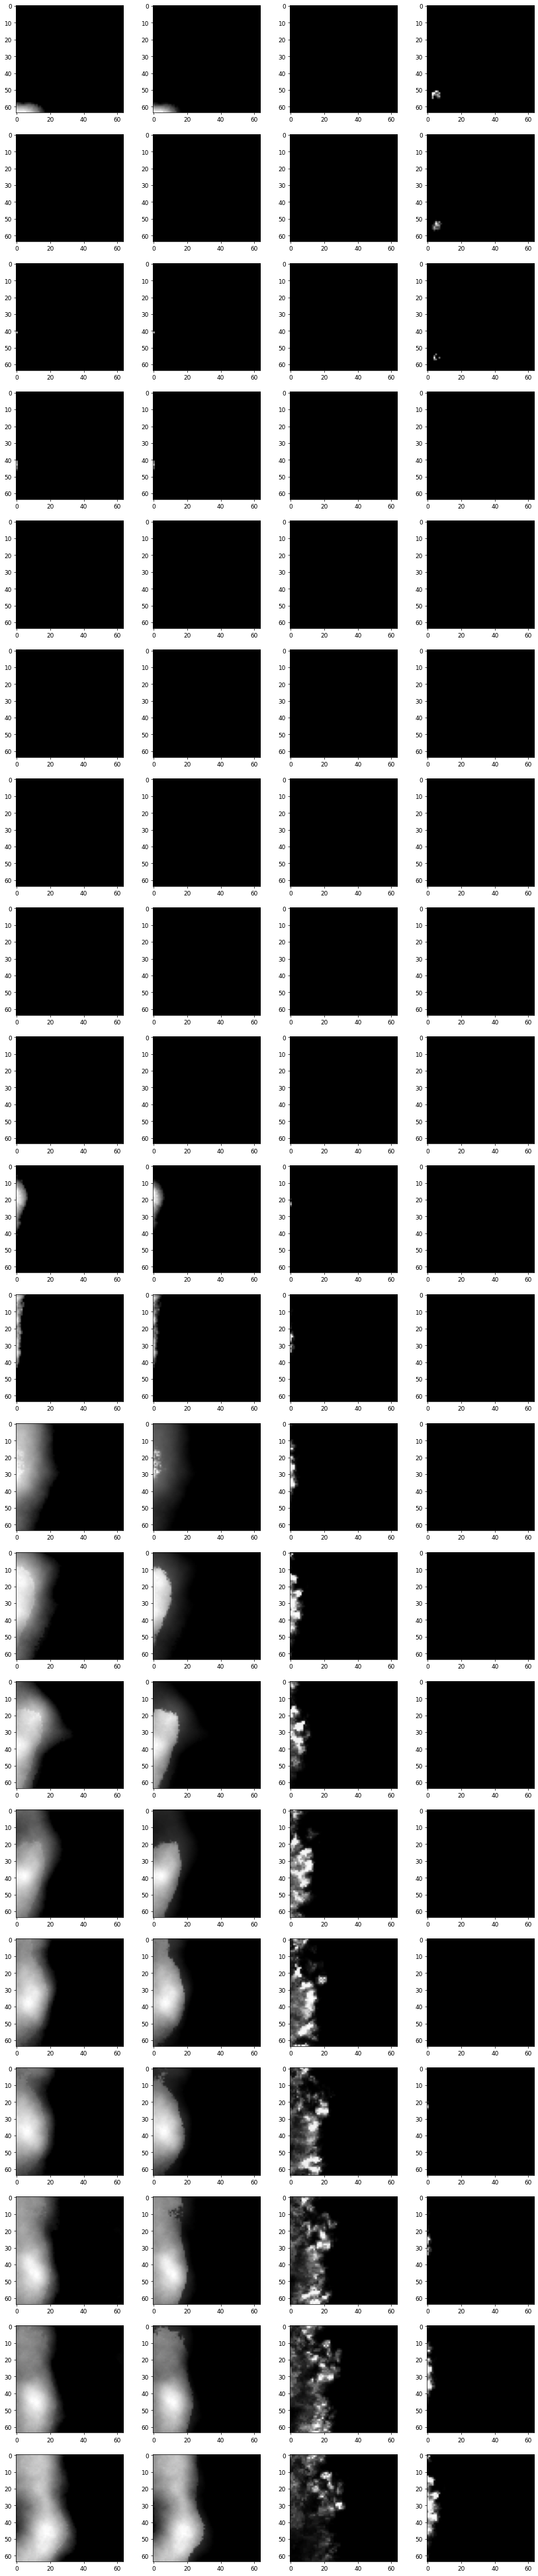

In [11]:
fig, axes = plt.subplots(20, 4, figsize=(16,8*10),dpi=64)
#fig.set_title(["mean","stdev","label"])
for batch,img in enumerate(mean):
    if batch == 20:
        break
    axes[batch,1].imshow(img[0,:,:,0],cmap="gray")
    axes[batch,0].imshow(stdev[batch][0,:,:,0],cmap="gray")
    axes[batch,2].imshow(label[batch][:,:,0],cmap="gray")
    axes[batch,3].imshow(y_transform[0](atm[batch][:,:,-1]),cmap="gray")
plt.show()

In [8]:
train,test =  getFreshSet(batch_size=100)

KeyboardInterrupt: 

In [ ]:
baseline = multiProc_eval(model,test,getFreshSet,x_transform=y_transform)

In [ ]:
baseline_dict = baseline.copy()
plotAUC(baseline_dict)